In [69]:
## titanic data set visulization

In [160]:
##read csv
##data prepocessing
##check null..> replace ,drop ((rowes)) check the missing values  
## check duplicates## بيشيل المتتكرر that increase time of training , overfit

#check outlier

###################eda######################
#ask question 3_5

In [162]:
import pandas as pd
file_path = r"C:\Users\yasso\OneDrive\Desktop\ai data\titanic\train.csv"
df = pd.read_csv(file_path)
print(df.head())
df

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:

print(f"Total missing values: {df.isnull().sum().sum()}")
df.isnull().sum()

Total missing values: 866


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [168]:
df.drop('Cabin',axis=1,inplace=True)

In [170]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [132]:
print(f"Total missing values: {df.isnull().sum().sum()}")

Total missing values: 2


In [172]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [176]:
df.duplicated().sum()



0

In [178]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)


In [146]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,2,38.0,1,0,71.2833,C
2,3,1,3,2,26.0,0,0,7.9250,S
3,4,1,1,2,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,2,19.0,0,0,30.0000,S
888,889,0,3,2,28.0,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [150]:
def count_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include='number'):  # Apply only to numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers below and above the bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts
 
outlier_counts_iqr = count_outliers_iqr(df)
print("Number of outliers in each column (IQR method):", outlier_counts_iqr)



Number of outliers in each column (IQR method): {'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Sex': 0, 'Age': 66, 'SibSp': 46, 'Parch': 213, 'Fare': 116}


In [185]:
def drop_outliers_iqr(df):
    for column in df.select_dtypes(include='number'):  # Apply only to numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows with outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
 

cleaned_df = drop_outliers_iqr(df)
 
print("Original DataFrame:\n", df)
print("\nDataFrame After Dropping Outliers (IQR method):\n", cleaned_df)

Original DataFrame:
      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0              1         0       3    1  22.0      1      0   7.2500        S
1              2         1       1    2  38.0      1      0  71.2833        C
2              3         1       3    2  26.0      0      0   7.9250        S
3              4         1       1    2  35.0      1      0  53.1000        S
4              5         0       3    1  35.0      0      0   8.0500        S
..           ...       ...     ...  ...   ...    ...    ...      ...      ...
886          887         0       2    1  27.0      0      0  13.0000        S
887          888         1       1    2  19.0      0      0  30.0000        S
888          889         0       3    2  28.0      1      2  23.4500        S
889          890         1       1    1  26.0      0      0  30.0000        C
890          891         0       3    1  32.0      0      0   7.7500        Q

[891 rows x 9 columns]

DataFrame After Dr

In [187]:
cleaned_df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})
cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
2,3,1,3,2,26.0,0,0,7.9250,S
3,4,1,1,2,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
5,6,0,3,1,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
884,885,0,3,1,25.0,0,0,7.0500,S
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,2,19.0,0,0,30.0000,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [189]:
#which age servide
#which class servide
#which sex servide
#servied and dead in each embarked

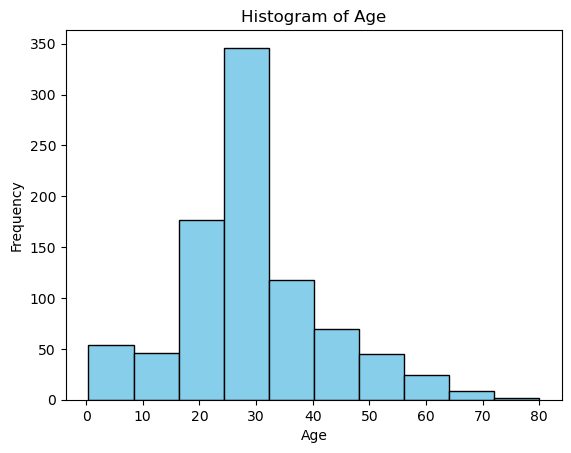

In [193]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})
print(df.head())

In [195]:
plt.boxplot(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'bins'

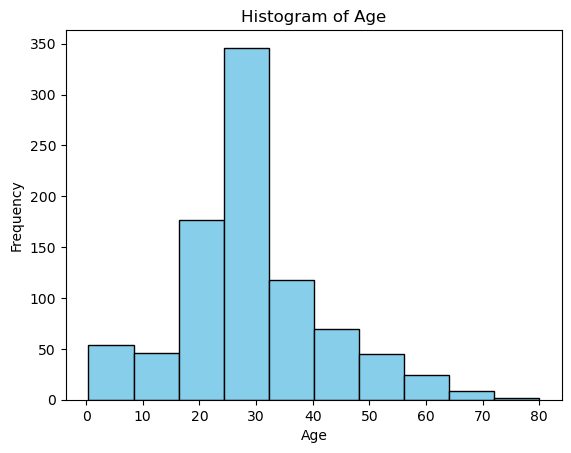

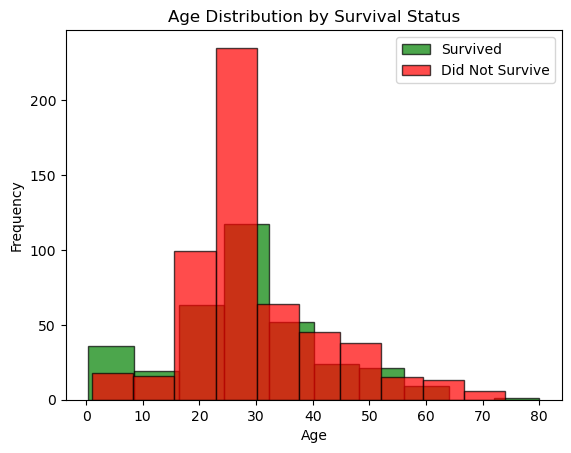

In [197]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
 
plt.hist(df[df['Survived'] == 1]['Age'], bins=10, alpha=0.7, label='Survived', color='green', edgecolor='black')
plt.hist(df[df['Survived'] == 0]['Age'], bins=10, alpha=0.7, label='Did Not Survive', color='red', edgecolor='black')
 
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
 

In [213]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100, 200]  
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']  
df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
 
age_grouped = df.groupby(['Age_Binned', 'Survived']).size().unstack(fill_value=0)
age_grouped['Total'] = age_grouped.sum(axis=1)
age_grouped['Survived_Percentage'] = (age_grouped[1] / age_grouped['Total']) * 100
age_grouped['Non_Survived_Percentage'] = (age_grouped[0] / age_grouped['Total']) * 100
age_grouped

C:\Users\yasso\AppData\Local\Temp\ipykernel_12360\1095965261.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby(['Age_Binned', 'Survived']).size().unstack(fill_value=0)


Survived,0,1,Total,Survived_Percentage,Non_Survived_Percentage
Age_Binned,,,,,
0-10,24,38,62,61.290323,38.709677
11-20,61,41,102,40.196078,59.803922
21-30,268,129,397,32.493703,67.506297
31-40,94,73,167,43.712575,56.287425
41-50,55,34,89,38.202247,61.797753
51-60,28,20,48,41.666667,58.333333
61-70,13,6,19,31.578947,68.421053
71-80,6,0,6,0.000000,100.000000
81-90,0,1,1,100.000000,0.000000


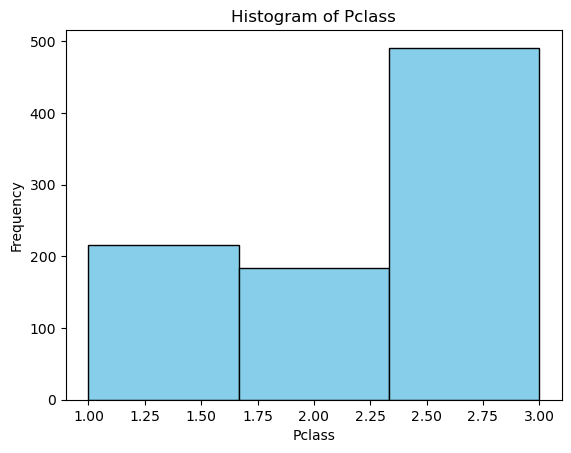

In [222]:
import matplotlib.pyplot as plt
plt.hist(df['Pclass'], bins=3, color='skyblue', edgecolor='black')
plt.title('Histogram of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

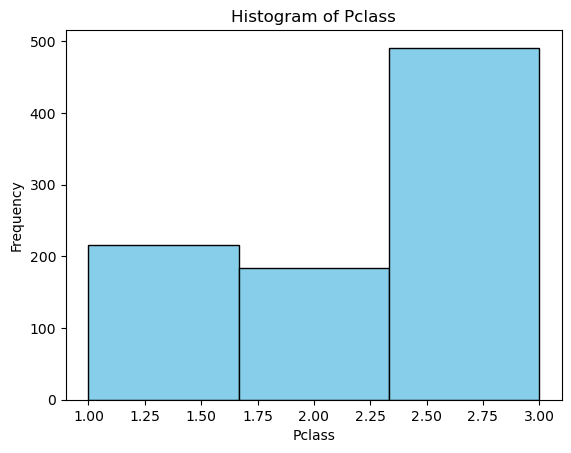

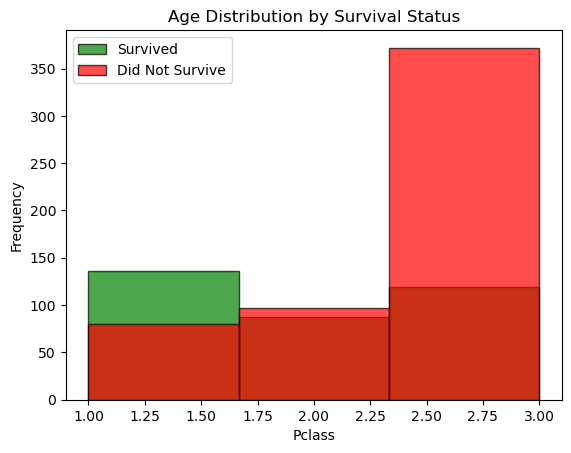

In [224]:
plt.hist(df['Pclass'], bins=3, color='skyblue', edgecolor='black')
plt.title('Histogram of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()
 
plt.hist(df[df['Survived'] == 1]['Pclass'], bins=3, alpha=0.7, label='Survived', color='green', edgecolor='black')
plt.hist(df[df['Survived'] == 0]['Pclass'], bins=3, alpha=0.7, label='Did Not Survive', color='red', edgecolor='black')
 
plt.title('Age Distribution by Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [228]:
Pclass_grouped = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
Pclass_grouped['Total'] = Pclass_grouped.sum(axis=1)
Pclass_grouped['Survived_Percentage'] = (Pclass_grouped[1] / Pclass_grouped['Total']) * 100
Pclass_grouped['Non_Survived_Percentage'] = (Pclass_grouped[0] / Pclass_grouped['Total']) * 100
Pclass_grouped

Survived,0,1,Total,Survived_Percentage,Non_Survived_Percentage
Pclass,,,,,
1,80,136,216,62.962963,37.037037
2,97,87,184,47.282609,52.717391
3,372,119,491,24.236253,75.763747


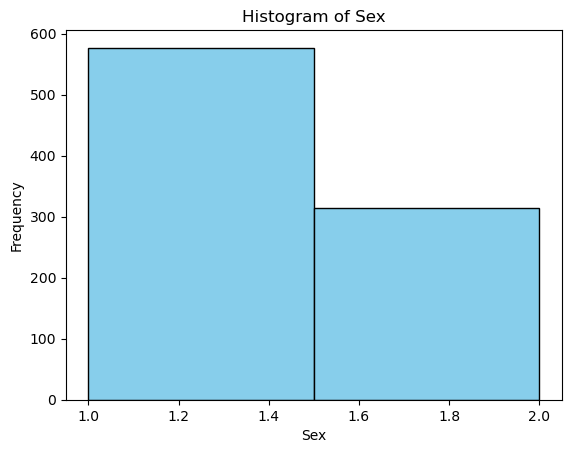

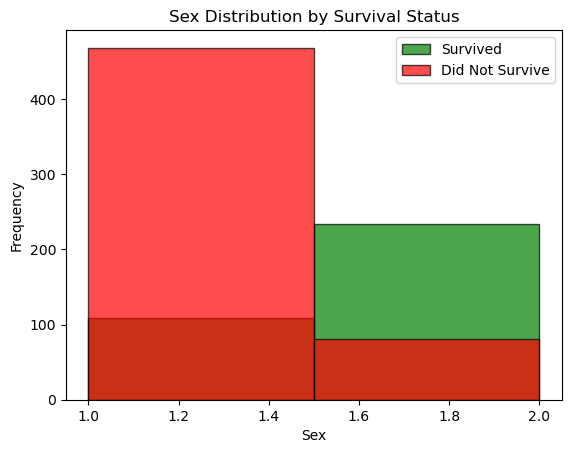

In [238]:
plt.hist(df['Sex'], bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()
 
plt.hist(df[df['Survived'] == 1]['Sex'], bins=2, alpha=0.7, label='Survived', color='green', edgecolor='black')
plt.hist(df[df['Survived'] == 0]['Sex'], bins=2, alpha=0.7, label='Did Not Survive', color='red', edgecolor='black')
 
plt.title('Sex Distribution by Survival Status')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [230]:
Pclass_grouped = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
Pclass_grouped['Total'] = Pclass_grouped.sum(axis=1)
Pclass_grouped['Survived_Percentage'] = (Pclass_grouped[1] / Pclass_grouped['Total']) * 100
Pclass_grouped['Non_Survived_Percentage'] = (Pclass_grouped[0] / Pclass_grouped['Total']) * 100
Pclass_grouped

Survived,0,1,Total,Survived_Percentage,Non_Survived_Percentage
Sex,,,,,
1,468,109,577,18.890815,81.109185
2,81,233,314,74.203822,25.796178


In [242]:
cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
2,3,1,3,2,26.0,0,0,7.9250,S
3,4,1,1,2,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
5,6,0,3,1,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
884,885,0,3,1,25.0,0,0,7.0500,S
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,2,19.0,0,0,30.0000,S
889,890,1,1,1,26.0,0,0,30.0000,C


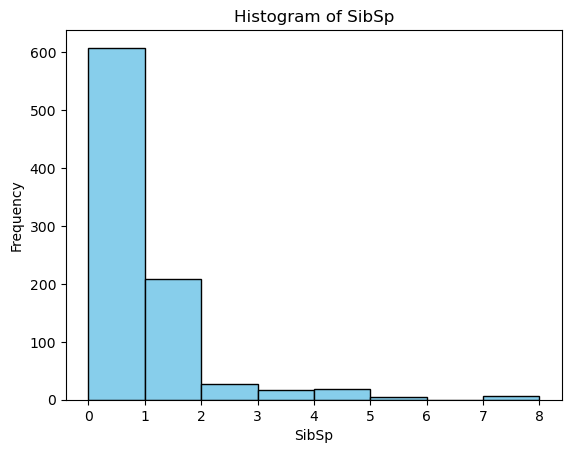

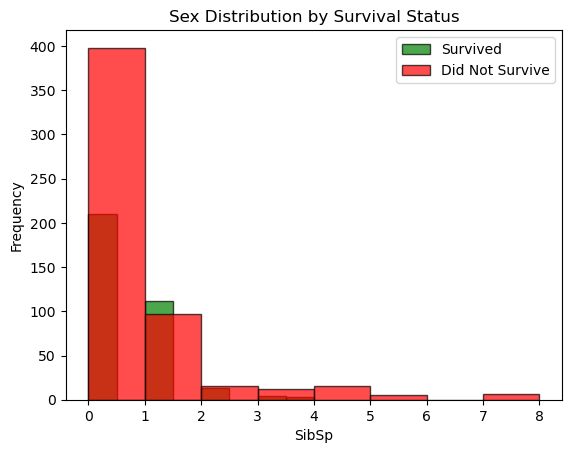

In [253]:
plt.hist(df['SibSp'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()
 
plt.hist(df[df['Survived'] == 1]['SibSp'], bins=8, alpha=0.7, label='Survived', color='green', edgecolor='black')
plt.hist(df[df['Survived'] == 0]['SibSp'], bins=8, alpha=0.7, label='Did Not Survive', color='red', edgecolor='black')
 
plt.title('Sex Distribution by Survival Status')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.legend()
plt.show()